Importing All the Packages

In [2]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import*
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

Using TensorFlow backend.


Data preprocessing

In [9]:
train_datagen = ImageDataGenerator(1/255.0)
test_datagen = ImageDataGenerator(1/255.0)
path = "D:\\kaggle\\dataset\\Animal_data\\Animal Image Dataset"

In [11]:
CATEGORIES = ['butterfly','cats','cow','dogs','elephant','hen','horse','monkey','panda','sheep','spider','squirrel']
CATEGORIES

['butterfly',
 'cats',
 'cow',
 'dogs',
 'elephant',
 'hen',
 'horse',
 'monkey',
 'panda',
 'sheep',
 'spider',
 'squirrel']

In [12]:
train_data = train_datagen.flow_from_directory('D:\\kaggle\\dataset\\Animal_data\\train',
                                          target_size = (200,200),
                                          batch_size = 80,
                                          class_mode = 'categorical')

Found 14365 images belonging to 12 classes.


In [13]:
train_data.class_indices

{'butterfly': 0,
 'cats': 1,
 'cow': 2,
 'dogs': 3,
 'elephant': 4,
 'hen': 5,
 'horse': 6,
 'monkey': 7,
 'panda': 8,
 'sheep': 9,
 'spider': 10,
 'squirrel': 11}

In [39]:
test_data = test_datagen.flow_from_directory('D:\\kaggle\\dataset\\Animal_data\\test',
                                          target_size = (200,200),
                                          batch_size = 64,
                                          class_mode = 'categorical')

Found 2813 images belonging to 12 classes.


Model Architecture

In [34]:
vgg = VGG16(input_shape = [200,200,3],weights= 'imagenet',include_top = False)
for layer in vgg.layers:
    layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [40]:
last = keras.layers.Flatten()(vgg.output)
final_output = keras.layers.Dense(12,activation = 'softmax')(last)
vgg_model = keras.Model(inputs = vgg.input,outputs = final_output)
vgg_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

Training the model

In [42]:
vgg_model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
m_history = vgg_model.fit_generator(train_data,validation_data = test_data,epochs = 10,steps_per_epoch = 50,verbose = 1)

Epoch 1/10
50/50 [==============================] - 865s 17s/step - loss: 7.1581 - accuracy: 0.7750 - val_loss: 6.5815 - val_accuracy: 0.8052
Epoch 2/10
50/50 [==============================] - 837s 17s/step - loss: 4.1930 - accuracy: 0.8763 - val_loss: 5.5768 - val_accuracy: 0.8510
Epoch 3/10
50/50 [==============================] - 836s 17s/step - loss: 3.3719 - accuracy: 0.9085 - val_loss: 5.6002 - val_accuracy: 0.8571
Epoch 4/10
50/50 [==============================] - 895s 18s/step - loss: 2.8524 - accuracy: 0.9247 - val_loss: 4.9157 - val_accuracy: 0.8738
Epoch 5/10
50/50 [==============================] - 912s 18s/step - loss: 2.4290 - accuracy: 0.9325 - val_loss: 5.2068 - val_accuracy: 0.8731
Epoch 6/10
50/50 [==============================] - 912s 18s/step - loss: 1.8982 - accuracy: 0.9450 - val_loss: 6.5007 - val_accuracy: 0.8638
Epoch 7/10
50/50 [==============================] - 902s 18s/step - loss: 1.7064 - accuracy: 0.9538 - val_loss: 5.5517 - val_accuracy: 0.8806
Epoch 

Saving the model

In [43]:
vgg_model.save("D:\\DL_models\\animal_class")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:\DL_models\animal_class\assets


In [3]:
model = keras.models.load_model('D:\\DL_models\\animal_class')

In [12]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

Testing the model on test images

In [20]:
cat = {0:'butterfly',1:'cats',2:'cow',3:'dogs',4:'elephant',5:'hen',6:'horse',7:'monkey',8:'panda',9:'sheep',10:'spider',11:'squirrel'}

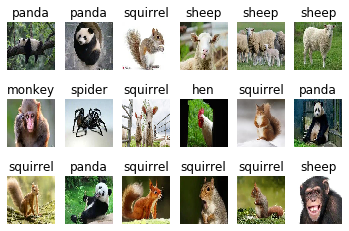

In [43]:
m=0
for i in range(20,38):
    m+=1
    test_image = image.load_img('D:\\kaggle\\dataset\\Animal_data\\test\\'+str(i)+'.jpg', target_size = (200, 200))
    plt.subplot(3,6,m)
    plt.imshow(test_image)
    plt.axis("off")
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    plt.title(cat[np.argmax(result)])
    